## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 7s 4s/step - loss: 0.2342 - accuracy: 0.9688 - val_loss: 0.8799 - val_accuracy: 0.7069
Epoch 2/50
2/2 [==============================] - 1s 772ms/step - loss: 0.2351 - accuracy: 0.9219 - val_loss: 0.8899 - val_accuracy: 0.6897
Epoch 3/50
2/2 [==============================] - 1s 763ms/step - loss: 0.2433 - accuracy: 0.9219 - val_loss: 0.9556 - val_accuracy: 0.6897
Epoch 4/50
2/2 [==============================] - 1s 797ms/step - loss: 0.1962 - accuracy: 0.9531 - val_loss: 0.8991 - val_accuracy: 0.7241
Epoch 5/50
2/2 [==============================] - 1s 788ms/step - loss: 0.2366 - accuracy: 0.9062 - val_loss: 0.8579 - val_accuracy: 0.7586
Epoch 6/50
2/2 [==============================] - 1s 752ms/step - loss: 0.2009 - accuracy: 0.9688 - val_loss: 0.9499 - val_accuracy: 0.7069
Epoch 7/50
2/2 [==============================] - 1s 778ms/step - loss: 0.2025 - accuracy: 0.9688 - val_loss: 0.8584 - val_accuracy: 0.7759
Epoch 8/50
2/2 [=======

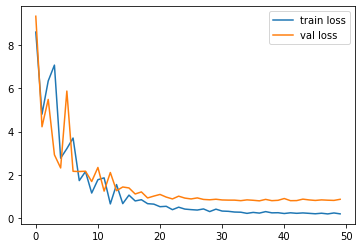

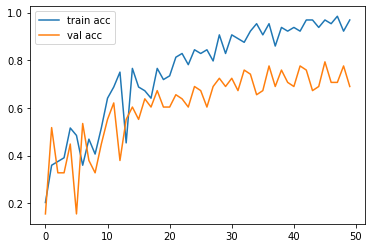

<Figure size 432x288 with 0 Axes>

In [35]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [36]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [37]:
y_pred = model.predict(test_set)

In [38]:
y_pred

array([[4.47305590e-02, 6.91454768e-01, 2.63814747e-01],
       [2.77009588e-02, 4.48590936e-03, 9.67813075e-01],
       [5.39232790e-03, 2.94884313e-02, 9.65119243e-01],
       [1.29608631e-01, 8.96408111e-02, 7.80750573e-01],
       [1.10031260e-05, 1.61953198e-04, 9.99827087e-01],
       [3.17357033e-02, 8.91777039e-01, 7.64872283e-02],
       [1.00298249e-03, 9.53377903e-01, 4.56190929e-02],
       [7.37286685e-03, 9.68560755e-01, 2.40663290e-02],
       [1.02126814e-01, 1.12626180e-02, 8.86610568e-01],
       [3.84215713e-02, 7.90546179e-01, 1.71032280e-01],
       [1.31849973e-02, 1.19048670e-01, 8.67766380e-01],
       [1.05581591e-02, 2.47195765e-01, 7.42246032e-01],
       [4.60259825e-01, 2.11722970e-01, 3.28017205e-01],
       [7.69246340e-01, 2.18726665e-01, 1.20270057e-02],
       [6.82537770e-03, 3.56372356e-01, 6.36802256e-01],
       [4.30043280e-01, 3.25278454e-02, 5.37428856e-01],
       [7.76900500e-02, 3.18626642e-01, 6.03683293e-01],
       [6.42766505e-02, 2.93423

In [39]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [40]:
y_pred

array([1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0, 2, 1,
       2, 2, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1,
       1, 2, 0, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 1], dtype=int64)

In [13]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [14]:
model=load_model("model_resnet50.h5")

In [15]:
img=image.load_img('Datasets/Test/mercedes/43.jpg',target_size=(224,224))

In [16]:
image1 = image.img_to_array(img)

image1 = image1/255  # Add this line 

image1 = image1.reshape((1, image1.shape[0], image1.shape[1], image1.shape[2]))

preds = model.predict(image1)

In [17]:
preds

array([[9.9460371e-03, 1.8003807e-04, 9.8987389e-01]], dtype=float32)

In [18]:
preds=np.argmax(preds, axis=1)
print(preds)

[2]


In [19]:
if preds==0:
    preds="The Car IS Audi"
elif preds==1:
    preds="The Car is Lamborghini"
else:
    preds="The Car Is Mercedes"
print(preds)

The Car Is Mercedes
